                                             
                                    LAPTOP PRICE PREDICTION USING LOGISTIC REGRESSION

Goal -  The analysis aims to find by what percent in future the laptops would not be touched screen

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import metrics
%matplotlib inline

In [3]:
laptop_data = pd.read_csv("C:/Users/USER/Desktop/Datasets/laptop_data_cleaned.csv")
laptop_data.head(10)

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
5,Acer,Notebook,4,2.10,9.967026,0,0,100.454670,AMD Processor,500,0,AMD,Windows
6,Apple,Ultrabook,16,2.04,11.644108,0,1,220.534624,Intel Core i7,0,0,Intel,Mac
7,Apple,Ultrabook,8,1.34,11.030615,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
8,Asus,Ultrabook,16,1.30,11.285443,0,0,157.350512,Intel Core i7,0,512,Nvidia,Windows
9,Acer,Ultrabook,8,1.60,10.621952,0,1,157.350512,Intel Core i5,0,256,Intel,Windows


In [4]:
laptop_data.shape

(1273, 13)

In [5]:
laptop_data.tail(10)

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
1263,Dell,Notebook,2,2.20,9.913097,0,0,100.454670,Other Intel Processor,500,0,Intel,Windows
1264,Lenovo,Notebook,8,2.60,10.776844,0,1,141.211998,Intel Core i7,1000,0,Nvidia,Windows
1265,HP,Notebook,6,2.04,10.285461,0,0,141.211998,AMD Processor,0,0,AMD,Windows
1266,Dell,Notebook,8,2.30,10.667632,0,0,100.454670,Intel Core i7,1000,0,AMD,Others
1267,HP,Netbook,2,1.17,9.317895,0,0,135.094211,Other Intel Processor,0,0,Intel,Windows
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1272,HP,Notebook,6,2.19,10.614129,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [6]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [7]:
laptop_data.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


In [8]:
laptop_data.isna().any()

Company        False
TypeName       False
Ram            False
Weight         False
Price          False
TouchScreen    False
Ips            False
Ppi            False
Cpu_brand      False
HDD            False
SSD            False
Gpu_brand      False
Os             False
dtype: bool

C:\Users\USER\AppData\Local\Temp\ipykernel_14668\416580847.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_metrics = laptop_data.corr()


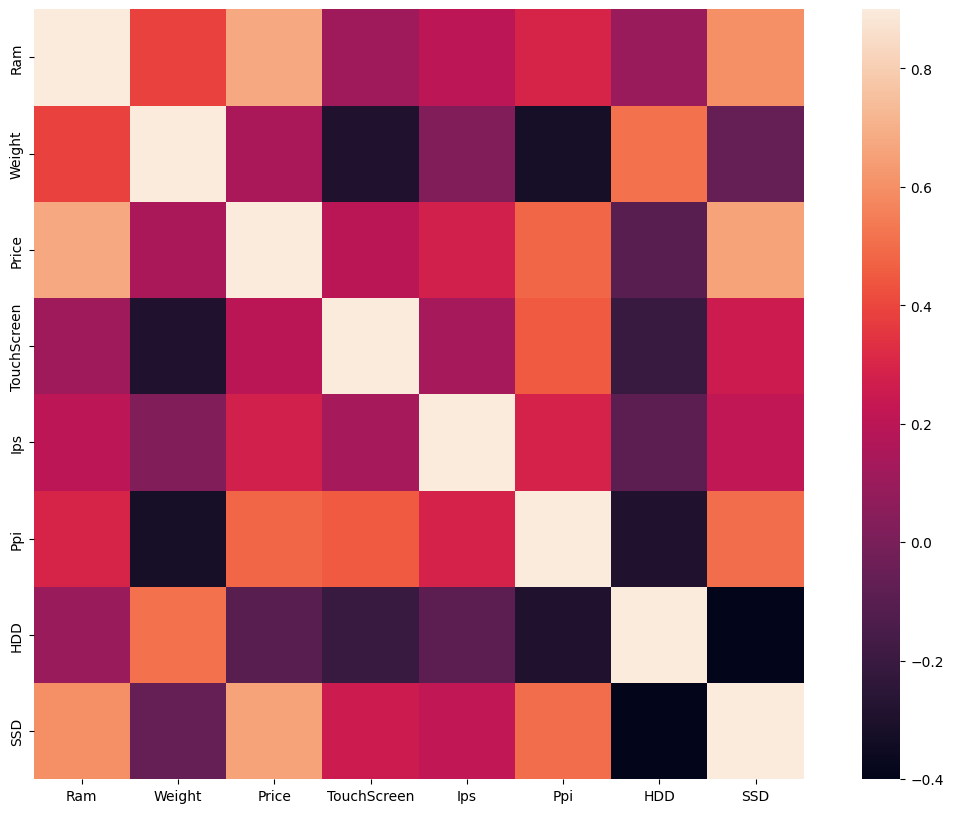

                  Ram    Weight     Price  TouchScreen       Ips       Ppi  \
Ram          1.000000  0.389134  0.680519     0.113316  0.202809  0.294927   
Weight       0.389134  1.000000  0.151386    -0.292288  0.023966 -0.319499   
Price        0.680519  0.151386  1.000000     0.194289  0.279240  0.480687   
TouchScreen  0.113316 -0.292288  0.194289     1.000000  0.136973  0.452107   
Ips          0.202809  0.023966  0.279240     0.136973  1.000000  0.288833   
Ppi          0.294927 -0.319499  0.480687     0.452107  0.288833  1.000000   
HDD          0.097340  0.510876 -0.097361    -0.205105 -0.090411 -0.290774   
SSD          0.599552 -0.056985  0.658808     0.252142  0.215197  0.499899   

                  HDD       SSD  
Ram          0.097340  0.599552  
Weight       0.510876 -0.056985  
Price       -0.097361  0.658808  
TouchScreen -0.205105  0.252142  
Ips         -0.090411  0.215197  
Ppi         -0.290774  0.499899  
HDD          1.000000 -0.400625  
SSD         -0.400625  1.

In [10]:
# Understanding correlation between the labels
correlation_metrics = laptop_data.corr()
fig = plt.figure(figsize=(15, 10))
sns.heatmap(correlation_metrics, vmax=0.9, square=True)
plt.show()
print(correlation_metrics)

In [11]:
laptop_data.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'TouchScreen', 'Ips',
       'Ppi', 'Cpu_brand', 'HDD', 'SSD', 'Gpu_brand', 'Os'],
      dtype='object')

In [12]:
# model building for logistic regression
# TouchScreen or not
count = 0
result = laptop_data['TouchScreen']
for i in range(len(result)):
    if result[i] == 0:
        count += 1
print("NotTouchScreen: ", count)

NotTouchScreen:  1086


In [13]:
count = 0
result = laptop_data['TouchScreen']
for i in range(len(result)):
    if result[i] == 1:
        count += 1
print("TouchScreen: ", count)

TouchScreen:  187


Text(0.5, 1.0, ' Not TouchScreen vs TouchScreen')

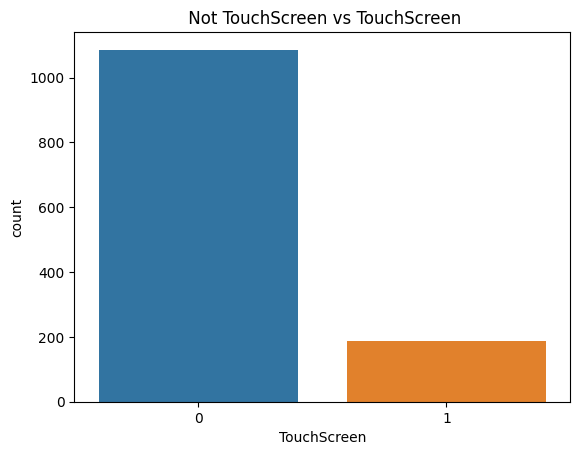

In [14]:
#printing countplot with seaborn
sns.countplot(x = laptop_data.TouchScreen)
plt.title(" Not TouchScreen vs TouchScreen")

In [13]:
# if in a dataset, any column values are in string which is important for prediction, then change them to binary numbers 0 and 1 
# converting strings to numericals and putting drop_first=True so that the conversion should not affect the prediction
"""company = pd.get_dummies(laptop_data['Company'], drop_first=True)
typename = pd.get_dummies(laptop_data['TypeName'], drop_first=True)
cpubrand = pd.get_dummies(laptop_data['Cpu_brand'], drop_first=True)
gpubrand = pd.get_dummies(laptop_data['Gpu_brand'], drop_first=True)
os = pd.get_dummies(laptop_data['Os'], drop_first=True)

# concatenating dummies to the original dataset
laptop_data = pd.concat([])"""

"company = pd.get_dummies(laptop_data['Company'], drop_first=True)\ntypename = pd.get_dummies(laptop_data['TypeName'], drop_first=True)\ncpubrand = pd.get_dummies(laptop_data['Cpu_brand'], drop_first=True)\ngpubrand = pd.get_dummies(laptop_data['Gpu_brand'], drop_first=True)\nos = pd.get_dummies(laptop_data['Os'], drop_first=True)\n\n# concatenating dummies to the original dataset\nlaptop_data = pd.concat([])"

In [15]:
# dropping unwanted columns 
laptop_data.drop(['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os'], axis = 1, inplace=True)

In [15]:
# after removing unwanted columns for prediction
laptop_data.columns

Index(['Ram', 'Weight', 'Price', 'TouchScreen', 'Ips', 'Ppi', 'HDD', 'SSD'], dtype='object')

In [16]:
# preparing training and testing dataset
y = laptop_data['TouchScreen']
ytrain, ytest = train_test_split(y, test_size=0.2, random_state=42)
# drop the target variable
x = laptop_data.drop(['TouchScreen'], axis=1)
xtrain, xtest = train_test_split(x, test_size=0.2, random_state=42)

In [17]:
# Using Logistic Regression
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [18]:
# performing predictions
y_pred = model.predict(xtest)

In [19]:
# classification report on performance of the model
from sklearn.metrics import classification_report
classification_report(ytest, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.88      0.98      0.92       216\n           1       0.64      0.23      0.34        39\n\n    accuracy                           0.86       255\n   macro avg       0.76      0.60      0.63       255\nweighted avg       0.84      0.86      0.83       255\n'

In [20]:
# confusion matrix manually
cm = metrics.confusion_matrix(ytest, y_pred)
print(cm)

[[211   5]
 [ 30   9]]


In [21]:
# final accuracy score
accuracy = model.score(xtest,  ytest)
print("Accuracy score of Logistic regression model is: ", accuracy * 100,"%")

Accuracy score of Logistic regression model is:  86.27450980392157 %


Hence, after performing  Multi-Variate Analysis and Machine Learning Regression Model, it has been predicted that 86% of the laptops will not be touched screen. In other words,
13.73% of laptops will be touched screen according to the analysis performed in these dataset.